# 미니 프로젝트 2
### 초기화

In [1]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [2]:
import pandas as pd
import os

train = pd.read_csv('train.csv')
X_train = train[train.columns.difference(["subject", "Activity"])] #feature
y_train = train['Activity']

test = pd.read_csv('test.csv')
X_test = test[test.columns.difference(["subject", "Activity"])] #feature
y_test = test['Activity']
#https://blog.naver.com/PostView.nhn?blogId=wideeyed&logNo=221250746480&parentCategoryNo=&categoryNo=&viewDate=&isShowPopularPosts=false&from=postView

In [3]:
# 밸런스 확인
train.Activity.value_counts()

LAYING                1407
STANDING              1374
SITTING               1286
WALKING               1226
WALKING_UPSTAIRS      1073
WALKING_DOWNSTAIRS     986
Name: Activity, dtype: int64

In [4]:
train.describe()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject
count,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,...,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000
mean,0.274488,-0.017695,-0.109141,-0.605438,-0.510938,-0.604754,-0.630512,-0.526907,-0.606150,-0.468604,...,-0.307009,-0.625294,0.008684,0.002186,0.008726,-0.005981,-0.489547,0.058593,-0.056515,17.413085
std,0.070261,0.040811,0.056635,0.448734,0.502645,0.418687,0.424073,0.485942,0.414122,0.544547,...,0.321011,0.307584,0.336787,0.448306,0.608303,0.477975,0.511807,0.297480,0.279122,8.975143
min,-1.000000,-1.000000,-1.000000,-1.000000,-0.999873,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-0.995357,-0.999765,-0.976580,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000
25%,0.262975,-0.024863,-0.120993,-0.992754,-0.978129,-0.980233,-0.993591,-0.978162,-0.980251,-0.936219,...,-0.542602,-0.845573,-0.121527,-0.289549,-0.482273,-0.376341,-0.812065,-0.017885,-0.143414,8.000000
50%,0.277193,-0.017219,-0.108676,-0.946196,-0.851897,-0.859365,-0.950709,-0.857328,-0.857143,-0.881637,...,-0.343685,-0.711692,0.009509,0.008943,0.008735,-0.000368,-0.709417,0.182071,0.003181,19.000000
75%,0.288461,-0.010783,-0.097794,-0.242813,-0.034231,-0.262415,-0.292680,-0.066701,-0.265671,-0.017129,...,-0.126979,-0.503878,0.150865,0.292861,0.506187,0.359368,-0.509079,0.248353,0.107659,26.000000
max,1.000000,1.000000,1.000000,1.000000,0.916238,1.000000,1.000000,0.967664,1.000000,1.000000,...,0.989538,0.956845,1.000000,1.000000,0.998702,0.996078,1.000000,0.478157,1.000000,30.000000


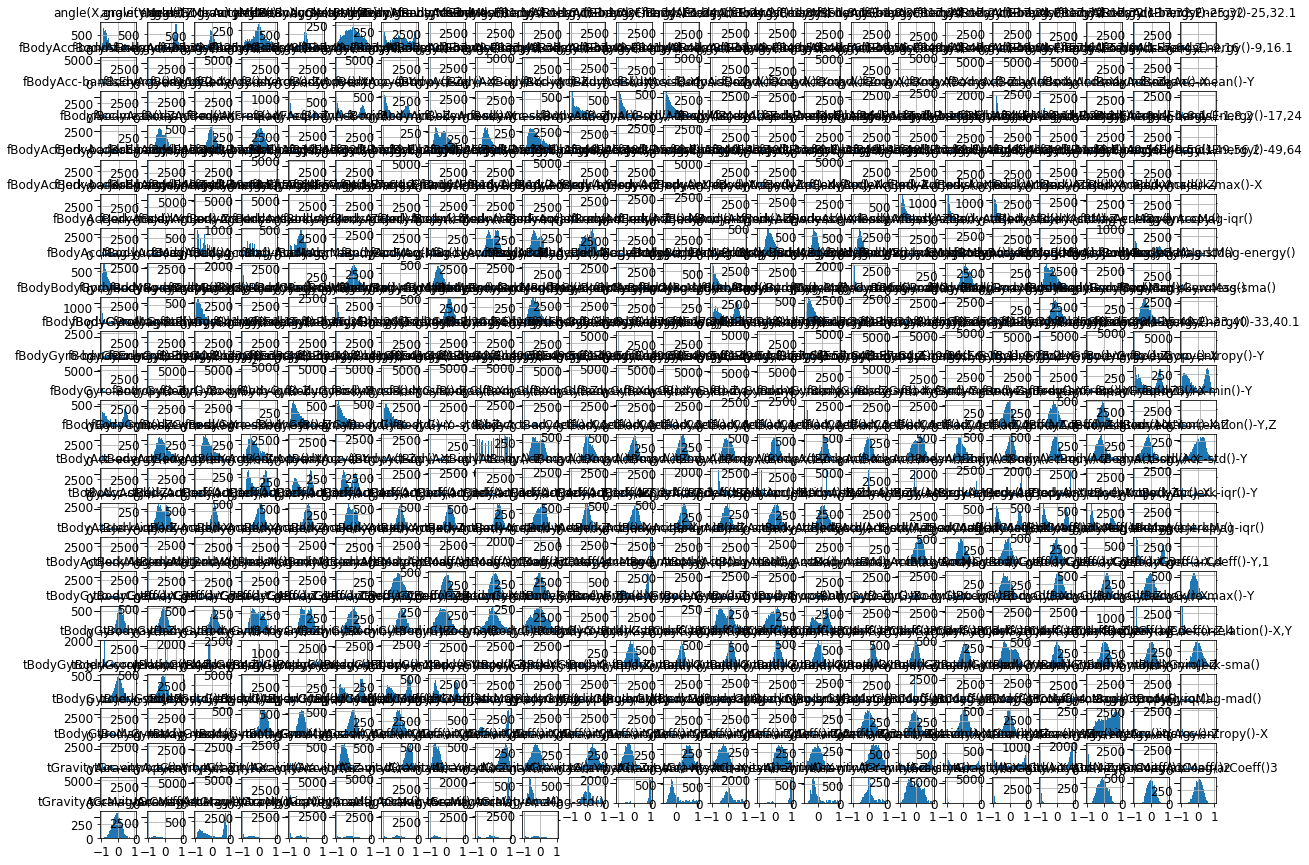

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
train.hist(bins=50, figsize=(20,15))
plt.show()
#"attribute_histogram_plots"

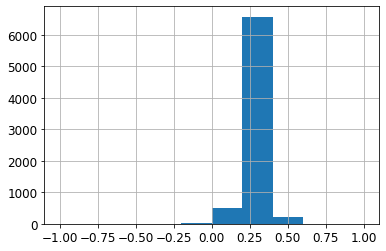

In [6]:
train["tBodyAcc-mean()-X"].hist()

In [7]:
X_train.keys()

Index(['angle(X,gravityMean)', 'angle(Y,gravityMean)', 'angle(Z,gravityMean)',
       'angle(tBodyAccJerkMean),gravityMean)', 'angle(tBodyAccMean,gravity)',
       'angle(tBodyGyroJerkMean,gravityMean)',
       'angle(tBodyGyroMean,gravityMean)', 'fBodyAcc-bandsEnergy()-1,16',
       'fBodyAcc-bandsEnergy()-1,16.1', 'fBodyAcc-bandsEnergy()-1,16.2',
       ...
       'tGravityAccMag-arCoeff()4', 'tGravityAccMag-energy()',
       'tGravityAccMag-entropy()', 'tGravityAccMag-iqr()',
       'tGravityAccMag-mad()', 'tGravityAccMag-max()', 'tGravityAccMag-mean()',
       'tGravityAccMag-min()', 'tGravityAccMag-sma()', 'tGravityAccMag-std()'],
      dtype='object', length=561)

### Training Models

In [8]:
from sklearn.model_selection import cross_val_score

ACCs = {}

In [9]:
%%time
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(n_estimators=100, random_state=42)
scores = cross_val_score(forest_clf, X_train, y_train, cv=10)
scores = np.round(scores, 4)
mean_acc = sum(scores/10)
print("Accuracy: ", scores)
print("Mean Accuracy: ", mean_acc)
ACCs['RF'] = mean_acc

Accuracy:  [0.9417 0.8794 0.9688 0.8521 0.9293 0.8899 0.9768 0.9781 0.9508 0.9577]
Mean Accuracy:  0.93246
Wall time: 2min 7s


In [10]:
%%time
forest_clf_for_var_select = RandomForestClassifier(n_estimators=100, random_state=42)
forest_clf_for_var_select.fit(X_train, y_train)
n_features = 350
important_features = pd.Series(forest_clf_for_var_select.feature_importances_, index=X_train.columns).sort_values(ascending=False).head(n_features)
print("상위 %s개 feature 선택: %.4f의 importance를 가짐"%(n_features, important_features.sum()))      
X_train_top_features = X_train[important_features.index]
print("이하의 변수들이 선택됨")
print(important_features)

상위 350개 feature 선택: 0.9605의 importance를 가짐
이하의 변수들이 선택됨
tGravityAcc-max()-X                   0.034616
tGravityAcc-energy()-X                0.033876
tGravityAcc-min()-X                   0.033720
angle(X,gravityMean)                  0.025768
tGravityAcc-energy()-Y                0.023433
tGravityAcc-mean()-Y                  0.022744
tGravityAcc-min()-Y                   0.022321
angle(Y,gravityMean)                  0.020516
tGravityAcc-max()-Y                   0.019638
tGravityAcc-mean()-X                  0.018825
fBodyAccJerk-bandsEnergy()-1,8        0.015573
tGravityAcc-max()-Z                   0.015155
tGravityAcc-energy()-Z                0.014031
tBodyAccJerk-iqr()-X                  0.012302
tGravityAcc-arCoeff()-Z,1             0.011332
tBodyAccMag-std()                     0.011087
tGravityAccMag-std()                  0.010529
fBodyAccJerk-std()-X                  0.010359
tBodyAccJerk-energy()-X               0.010293
tBodyAcc-max()-X                      0.009342
fBod

In [11]:
%%time
# 변수선택한 걸로 돌려보기 1
from sklearn.ensemble import RandomForestClassifier
forest_clf_top = RandomForestClassifier(n_estimators=100, random_state=42)
scores = cross_val_score(forest_clf_top, X_train_top_features, y_train, cv=10)
scores = np.round(scores, 4)
mean_acc = np.round(sum(scores/10),4)
print("Accuracy: ", scores)
print("Mean Accuracy: ", mean_acc)
ACCs['RF_top'] = mean_acc

Accuracy:  [0.9444 0.874  0.9634 0.8331 0.9226 0.8927 0.9714 0.9795 0.9536 0.9508]
Mean Accuracy:  0.9286
Wall time: 1min 38s


In [12]:
%%time
# 변수선택한 걸로 돌려보기 2
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(multi_class='ovr', solver="liblinear", random_state=42)
scores = cross_val_score(log_reg, X_train_top_features, y_train, cv=10)
scores = np.round(scores, 4)
mean_acc = np.round(sum(scores/10),4)
print("Accuracy: ", scores)
print("Mean Accuracy: ", mean_acc)
ACCs['Logit'] = mean_acc

Accuracy:  [0.9783 0.878  0.9702 0.844  0.9239 0.9524 0.9905 0.9795 0.9645 0.9645]
Mean Accuracy:  0.9446
Wall time: 40.4 s


- saga = 0.94443
- sag = 0.94497
- https://sonseungha.tistory.com/396 multi_class 없다고 경고떠서 추가
- https://computer-nerd.tistory.com/66 변수 정리

In [13]:
%%time
# 변수선택한 걸로 돌려보기 3
from sklearn.svm import SVC
svr_clf = SVC(gamma="auto", probability=True, random_state=42)
scores = cross_val_score(svr_clf, X_train_top_features, y_train, cv=10)
scores = np.round(scores, 4)
mean_acc = np.round(sum(scores/10),4)
print("Accuracy: ", scores)
print("Mean Accuracy: ", mean_acc)
ACCs['SVC'] = mean_acc

Accuracy:  [0.9743 0.8645 0.9553 0.8236 0.9198 0.909  0.9645 0.9413 0.9522 0.9467]
Mean Accuracy:  0.9251
Wall time: 4min 58s


In [14]:
%%time
from sklearn.ensemble import VotingClassifier
# 보팅 만들어서 돌리기
voting_clf = VotingClassifier(
    estimators=[('fct', forest_clf_top), ('lr', log_reg), ('svc', svr_clf)],
    voting='soft')
voting_clf.fit(X_train, y_train)
scores = cross_val_score(voting_clf, X_train_top_features, y_train, cv=10)
scores = np.round(scores, 4)
mean_acc = np.round(sum(scores/10),4)
print("Accuracy: ", scores)
print("Mean Accuracy: ", mean_acc)
ACCs['Voting'] = mean_acc

Accuracy:  [0.9797 0.8726 0.9715 0.8494 0.9429 0.9321 0.9891 0.9781 0.9604 0.9617]
Mean Accuracy:  0.9437
Wall time: 7min 50s


In [15]:
ACCs

{'RF': 0.93246,
 'RF_top': 0.9286,
 'Logit': 0.9446,
 'SVC': 0.9251,
 'Voting': 0.9437}

In [16]:
print("best performance") #최고 성능

best_model = max(ACCs, key=ACCs.get)
best_model, ACCs[best_model]

best performance


('Logit', 0.9446)

### test set 성능

In [17]:
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [18]:
%%time
log_reg_clf = LogisticRegression(multi_class='ovr', solver="liblinear", random_state=42)
log_reg_clf.fit(X_train, y_train)

Wall time: 6.31 s


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=None, penalty='l2',
                   random_state=42, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [19]:
train_pred = log_reg_clf.predict(X_train)
train_acc = accuracy_score(train_pred, y_train)
print("Train acc: %.4f"%train_acc)

Train acc: 0.9909


In [20]:
%%time
y_train_pred = cross_val_predict(log_reg_clf, X_train, y_train, cv=10)
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

Wall time: 54.3 s


array([[1405,    0,    0,    0,    2,    0],
       [  11, 1199,   76,    0,    0,    0],
       [   0,   83, 1291,    0,    0,    0],
       [   0,    0,    0, 1155,   11,   60],
       [   0,    0,    0,    9,  937,   40],
       [   0,   16,    0,   39,   35,  983]], dtype=int64)

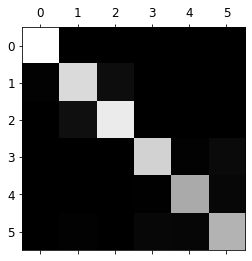

In [21]:
plt.matshow(conf_mx, cmap=plt.cm.gray)

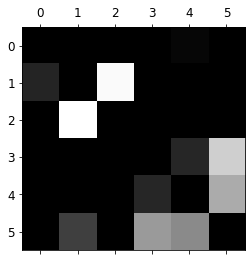

In [22]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)

In [23]:
test_pred = log_reg_clf.predict(X_test)
test_acc = accuracy_score(test_pred, y_test)
print("Test acc: %.4f"%test_acc)
#https://subinium.github.io/basic-of-Evaluation/

Test acc: 0.9620
